# TITANIC - Projeto II
### Introdução
Com base levantados nesta [fonte](https://www.kaggle.com/c/titanic/data), será avaliado relações dos sobreviventes e dos que pereceram da tragédia com sua idade, classe que pertenciam no navio, sexo, faixa etária e o porto de onde embarcaram.

In [20]:
# Importando dependências
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [21]:
# Carregando os dados
df = pd.read_csv('titanic-data-6.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Perguntas
1. Com base nos dados, quantos sobreviveram e quantos não?
9. Qual a idade média dos sobreviventes e dos não sobreviventes?
9. Qual a relação de sobreviventes e não sobreviventes por classe?
9. Qual a relação de sobreviventes e não sobreviventes por sexo?
9. Qual a faixa etária com mais sobreviventes e dos não sobreviventes?

## Limpeza dos dados
Os dados "Ticket", "Fare", "Cabin", "Sib Sp" e "Parch" serão removidos, pois não terão utilizades para os questionamentos levantados. Além disso, serão removidos registros que não contém a idade do passageiro.

In [22]:
# Renomeando as colunas
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Removendo colunas que não serão usadas
df.drop(['sibsp', 'parch', 'ticket', 'fare', 'cabin'], axis=1, inplace=True)
df.head()

,survived,pclass,name,sex,age,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,S


In [24]:
# Verificando registros com dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
embarked    889 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 41.8+ KB


In [25]:
# Removendo registros com a idade e porto de embarque faltantes
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
survived    712 non-null int64
pclass      712 non-null int64
name        712 non-null object
sex         712 non-null object
age         712 non-null float64
embarked    712 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 38.9+ KB


In [26]:
# Verificando se há registros duplicados
df.duplicated().sum()

0

In [27]:
# Salvando conjunto de dados modificado
df.to_csv('titanic-clean.csv', index=False)

## Separação dos dados
Para facilitar a resposta dos questionamentos, o conjunto de dados principal será dividido em dois conjuntos: sobreviventes e não sobreviventes.

In [28]:
df_survived = df.query('survived == 1')
df_not_survived = df.query('survived == 0')
df_survived.to_csv('titanic_survived.csv', index=False)
df_not_survived.to_csv('titanic_not_survived.csv', index=False)

## Análise


In [29]:
# Funções para geração de gráfico de barra dupla
width = 0.3 #largura das barras
def plot_bar_graph(groupby, title, xticks, x_label, y_label):
        """
            Plota um gráfico com 2 barras, uma para os sobreviventes e outra para os não 
        """
        # Contagem sobreviventes e não por agrupamento
        df_survived_by_group = df_survived.groupby(groupby)['survived'].count() / df.shape[0] * 100
        df_not_survived_by_group = df_not_survived.groupby(groupby)['survived'].count() / df.shape[0] * 100
        
        # Localização no eixo x dos grupos
        ind = np.arange(len(df_survived_by_group))
        #Definindo as barras do gráfico
        survived_bars = plt.bar(ind, df_survived_by_group, width, color='b', alpha=.5, label='Sobreviventes')
        not_survived_bars = plt.bar(ind + width, df_not_survived_by_group, width, color='r', alpha=.5, label='Não Sobreviveram')
        
        # Gerando o gráfico
        config_graph(title, xticks, x_label, y_label, ind)
        
def config_graph(title, xticks, x_label, y_label, ind):
        plt.title(title)
        labels = xticks
        locations = ind + width / 2
        plt.xticks(locations, labels, fontsize = 12)
        plt.ylabel(y_label, fontsize = 15)
        plt.xlabel(x_label, fontsize = 20)
        plt.legend();

288 sobreviventes e 424 não sobreviventes.


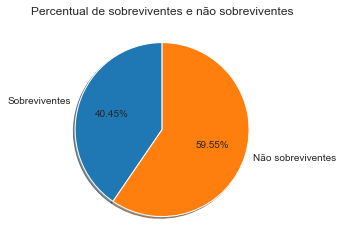

In [30]:
# Q1: Com base nos dados, quantos sobreviveram e quantos não?
print("{0} sobreviventes e {1} não sobreviventes.".format(df_survived.shape[0], df_not_survived.shape[0]))
counts = [df_survived.shape[0]  / df.shape[0] * 100, df_not_survived.shape[0] / df.shape[0] * 100]
labels = "Sobreviventes", "Não sobreviventes"
plt.pie(counts, labels=labels, shadow=True, startangle=90, autopct='%1.2f%%')
plt.title('Percentual de sobreviventes e não sobreviventes');


In [31]:
# Q2: Qual a idade média dos sobreviventes e dos não sobreviventes?
print("Idade média dos sobreviventes: {0} anos. Idade média dos não sobreviventes: {1} anos. A média de idade foi aproximada."
      .format(round(df_survived.describe()['age']['mean'], 2), round(df_not_survived.describe()['age']['mean'], 2)))

Idade média dos sobreviventes: 28.19 anos. Idade média dos não sobreviventes: 30.63 anos. A média de idade foi aproximada.


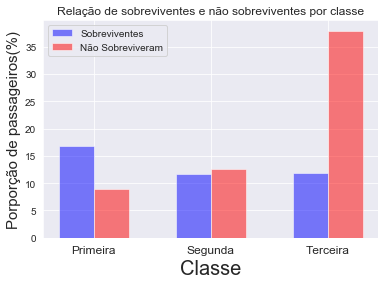

In [32]:
# Q3: Qual a relação de sobreviventes e não sobreviventes por classe?
# Gerando o gráfico por classe
title = 'Relação de sobreviventes e não sobreviventes por classe'
labels = ['Primeira', 'Segunda', 'Terceira']
ylabel = 'Porporção de passageiros(%)'
xlabel = 'Classe'

plot_bar_graph('pclass', title, labels, xlabel, ylabel)

In [33]:
print('De acordo com o gráfico, pereceram mais passeiros da terceira classe')

De acordo com o gráfico, pereceram mais passeiros da terceira classe


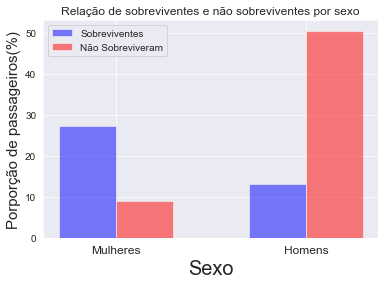

In [34]:
# Q4: Qual a relação de sobreviventes e não sobreviventes por sexo?
# Gerando o gráfico por classe
title = 'Relação de sobreviventes e não sobreviventes por sexo'
labels = ['Mulheres', 'Homens'] #Labels do eixo x
ylabel = 'Porporção de passageiros(%)'
xlabel = 'Sexo'

plot_bar_graph('sex', title, labels, xlabel, ylabel)

In [35]:
print('De acordo com o gráfico, a maioria dos homens não sobreviveram')

De acordo com o gráfico, a maioria dos homens não sobreviveram


In [36]:
#Q5: Qual a faixa etária com mais sobreviventes e dos não sobreviventes?

# Definindo as faixa etárias
bin_ages = [df['age'].describe()['min'], 1, 18, 60, df['age'].describe()['max']]
# Rótulos para as faixas etárias
bin_labels = ['Baby', 'Young', 'Adult', 'Old']
df['age_group'] = pd.cut(df['age'], bin_ages, labels=bin_labels)
df.head(15)

,survived,pclass,name,sex,age,embarked,age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,S,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,S,Adult
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,S,Adult
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,S,Young
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S,Adult
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C,Young
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,S,Young


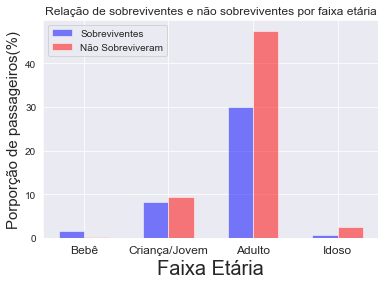

In [37]:
# Gerando gráfico em barras
df_survived_by_age_group = df.query('survived == 1').groupby("age_group")['survived'].count() / df.shape[0] * 100
df_not_survived_by_age_group = df.query('survived == 0').groupby("age_group")['survived'].count() / df.shape[0] * 100
ind = np.arange(len(df_survived_by_age_group))
survived_bars = plt.bar(ind, df_survived_by_age_group, width, color='b', alpha=.5, label='Sobreviventes')
not_survived_bars = plt.bar(ind + width, df_not_survived_by_age_group, width, color='r', alpha=.5, label='Não Sobreviveram')

title = 'Relação de sobreviventes e não sobreviventes por faixa etária'
labels = ['Bebê', 'Criança/Jovem', 'Adulto', 'Idoso']
ylabel = 'Porporção de passageiros(%)'
xlabel = 'Faixa Etária'

config_graph(title, labels, xlabel, ylabel, ind)

In [38]:
print('Como observado, a maioria de bebês e crianças sobreviveram. Quantos aos adultos, grande parte pereceram')

Como observado, a maioria de bebês e crianças sobreviveram. Quantos aos adultos, grande parte pereceram


## Resultados
De acordo com a análise, a maioria pereceram na tragédia. Em relação a classe do passageiro, a maioria que sobreviveu era da primeira classe e dos que não sobreviveram, terceira classe. Provavelmente, conforme a fonte[2], devido aos poucos botes salva-vidas e, durante o naufrágio, foi definido uma ordem de retirada por classe. Além disso, muitos botes deixaram o navio com espaço para mais sobreviventes. A expressão "Mulheres e crianças primeiro" em um acidente fez jus nesta tragédia. Como observado nos gráficos, a maioria das mulheres e um número considerável de crianças sobreviveram.

## Problemas encontrados
* Devidos a dados faltantes, alguns registros foram removidos da análise.

## Bibliografia
* [1]Fonte dos dados: https://www.kaggle.com/c/titanic/data
* [2]Fonte que auxiliou na análise do dados: https://pt.wikipedia.org/wiki/Naufr%C3%A1gio_do_RMS_Titanic
* [3]Documentação do Pandas: https://pandas.pydata.org/
* [4]Documentação do Matplotlib: https://matplotlib.org/index.html